In [415]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn.ensemble import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_auc_score,f1_score

import seaborn as sns
import matplotlib.pyplot as plt


import scipy.stats as stats

from scipy.stats import pearsonr

### loading the Dataset

In [416]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [417]:
df.shape

(30000, 25)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### summarising the statistics

In [420]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [340]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

### checking the Missing values

In [421]:

df.isnull().sum()  # no missing values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Exploratory data analysis

In [343]:
df=df.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [344]:
num=df.columns
num

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [345]:
### univariate analysis

/Users/chutki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='default.payment.next.month', ylabel='Density'>

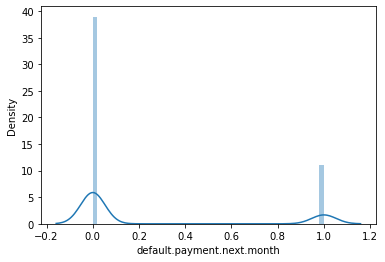

In [403]:
sns.distplot(df["default.payment.next.month"])

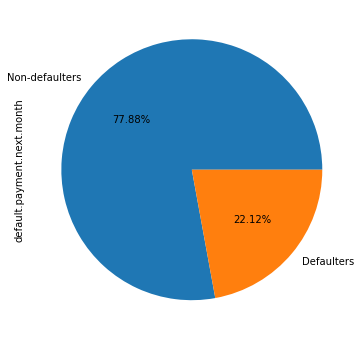

In [346]:
df["default.payment.next.month"].value_counts().plot(kind="pie",labels=["Non-defaulters", "Defaulters"],autopct="%0.002f%%",figsize=(6,6))
plt.show()

/Users/chutki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

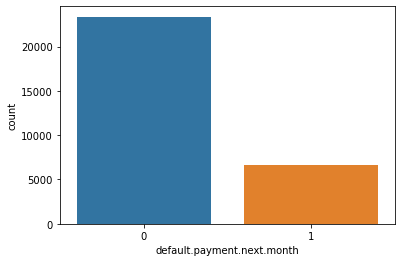

In [347]:
import seaborn as sns

sns.countplot(df["default.payment.next.month"])

In [348]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["PAY_2"])

In [349]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["EDUCATION"])
#plt.show()

In [350]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["PAY_3"])

In [351]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["PAY_4"])

In [352]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["PAY_5"])

In [353]:
#sns.countplot(x=df["default.payment.next.month"],hue=df["PAY_6"])

### scalling the numeric data

In [354]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss_num=pd.DataFrame(ss.fit_transform(df[num]),columns=df[num].columns)
ss_num.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942


/Users/chutki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='default.payment.next.month', ylabel='Density'>

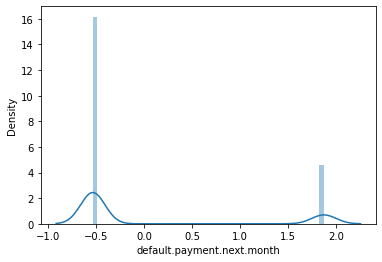

In [414]:
## after scalling

sns.distplot(ss_num["default.payment.next.month"])

### statisticl Analysis 

In [355]:
## since we dit have categoric varibles in the dataset we performed pearsonr for numerical columns.

In [356]:
for i in ss_num.columns:
    #obs=pd.crosstab()
    corr,pval=pearsonr(df["default.payment.next.month"],df[i])
    #pvalue.append(pval)
    print("p value","=",pval,"          ","corr coef","=",corr)

p value = 1.3022439533599121e-157            corr coef = -0.15351987639350728
p value = 4.395248803621932e-12            corr coef = -0.03996057770544166
p value = 1.2250380334152756e-06            corr coef = 0.028006077656249913
p value = 2.4853638863386893e-05            corr coef = -0.024339215683404105
p value = 0.01613684589146837            corr coef = 0.013889834301963257
p value = 0.0            corr coef = 0.3247937284786216
p value = 0.0            corr coef = 0.26355120167216517
p value = 0.0            corr coef = 0.2352525137249161
p value = 1.89929659e-315            corr coef = 0.2166136368424243
p value = 1.1266079545828523e-279            corr coef = 0.20414891387616643
p value = 7.296740483833448e-234            corr coef = 0.1868663616535451
p value = 0.0006673295491736952            corr coef = -0.01964419714322153
p value = 0.013957362393515334            corr coef = -0.014193218088215722
p value = 0.014769982711828975            corr coef = -0.014075518043214746


In [357]:
## creating the dataframe pvale and correlation values

pearsonr_table=pd.DataFrame()
pearsonr_table["num_independent_variables "]=num

pearsonr_table["P-value"]=pval
pearsonr_table["correlation coeef values"]=corr
pearsonr_table


# here the p values are less than the significance level so we an reject the null hypothesis H0.

,num_independent_variables,P-value,correlation coeef values
0,LIMIT_BAL,0.0,1.0
1,SEX,0.0,1.0
2,EDUCATION,0.0,1.0
3,MARRIAGE,0.0,1.0
4,AGE,0.0,1.0
5,PAY_0,0.0,1.0
6,PAY_2,0.0,1.0
7,PAY_3,0.0,1.0
8,PAY_4,0.0,1.0
9,PAY_5,0.0,1.0


In [358]:
X=df.iloc[:,:-1]
y=df["default.payment.next.month"]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [359]:
from sklearn.model_selection import train_test_split

In [360]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=30,random_state=1000)

In [361]:
from sklearn.neighbors import KNeighborsClassifier

In [362]:
knn=KNeighborsClassifier()
knn.fit(Xtrain,ytrain)
knn_ypred=knn.predict(Xtest)
knn_ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [363]:
print("1. KNN", accuracy_score(ytest,knn_ypred))
pd.crosstab(ytest,knn_ypred)
print(f1_score(ytest,knn_ypred))

1. KNN 0.6333333333333333
0.0


In [364]:
lr=LogisticRegression()
lr.fit(Xtrain,ytrain)
lr_ypred=lr.predict(Xtest)

/Users/chutki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [236]:
print("2.Accuracy logistic r  :",accuracy_score(ytest, lr_ypred))
print(f1_score(ytest, lr_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

2.Accuracy logistic r  : 0.7333333333333333
0.0


In [237]:
RF=RandomForestClassifier()
RF.fit(Xtrain,ytrain)
RF_ypred=RF.predict(Xtest)

print("3.Accuracy Random forest r  :",accuracy_score(ytest, RF_ypred))
print(f1_score(ytest, RF_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

3.Accuracy Random forest r  : 0.7
0.39999999999999997


In [240]:
DT=DecisionTreeClassifier()
DT.fit(Xtrain,ytrain)
DT_ypred=DT.predict(Xtest)

print("4.Accuracy Decision tree  :",accuracy_score(ytest, DT_ypred))
print(f1_score(ytest, DT_ypred))
#print(recall(ytest, DT_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

4.Accuracy Decision tree  : 0.7
0.39999999999999997


In [241]:
nb=GaussianNB()
nb.fit(Xtrain,ytrain)
nb_ypred=nb.predict(Xtest)

print("5.Accuracy Naive Bayes  :",accuracy_score(ytest, nb_ypred))
print(f1_score(ytest, nb_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

5.Accuracy Naive Bayes  : 0.3333333333333333
0.4444444444444445


In [242]:
ab=AdaBoostClassifier()
ab.fit(Xtrain,ytrain)
ab_ypred=ab.predict(Xtest)

print("6.Adaboost:",accuracy_score(ytest, ab_ypred))
print(f1_score(ytest, ab_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

6.Adaboost: 0.7666666666666667
0.36363636363636365


In [243]:
gb=GradientBoostingClassifier()
gb.fit(Xtrain,ytrain)
gb_ypred=gb.predict(Xtest)

print("7.Gradboost:",accuracy_score(ytest, gb_ypred))
print(f1_score(ytest, gb_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

7.Gradboost: 0.7333333333333333
0.3333333333333333


In [201]:
from xgboost import XGBClassifier

In [244]:
xgb=XGBClassifier()
xgb.fit(Xtrain,ytrain)
xgb_ypred=xgb.predict(Xtest)

print("8.XGboost:",accuracy_score(ytest, xgb_ypred))
print(f1_score(ytest, xgb_ypred))
#print("\n Confusion matrix : \n",confusion_matrix(ytest,lr_ypred))
#print("\n Classification report : \n",classification_report(ytest,lr_ypred))

8.XGboost: 0.7333333333333333
0.42857142857142855


### SMOTE

In [203]:
from imblearn.over_sampling import SMOTE

In [204]:
smote=SMOTE()

In [205]:
X_train_smote,y_train_smote=smote.fit_resample(Xtrain,ytrain)

In [206]:
from collections import Counter

In [207]:
print("Before smote: ", Counter(ytrain))
print("Before smote: ", Counter(y_train_smote))

Before smote:  Counter({0: 23342, 1: 6628})
Before smote:  Counter({0: 23342, 1: 23342})


In [245]:
knn.fit(X_train_smote,y_train_smote)
knn_ypred_sm=knn.predict(Xtest)

print(accuracy_score(ytest,knn_ypred_sm))
pd.crosstab(ytest,knn_ypred_sm) 
print(f1_score(ytest, knn_ypred_sm))

0.5
0.3478260869565218


In [283]:
lr=LogisticRegression()
lr.fit(X_train_smote,y_train_smote)
lr_sm_ypred=lr.predict(Xtest)

print("2. lr", accuracy_score(ytest,lr_sm_ypred))
print(f1_score(ytest, lr_sm_ypred))
pd.crosstab(ytest,knn_ypred_sm) 

2. lr 0.7666666666666667
0.631578947368421


/Users/chutki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
default.payment.next.month,,
0,11,11
1,4,4


In [400]:
11/22

0.5

In [401]:
4/8

0.5

In [249]:
RF=RandomForestClassifier()
RF.fit(X_train_smote,y_train_smote)
RF_sm_ypred=RF.predict(Xtest)

print("3.Accuracy Random forest r  :",accuracy_score(ytest, RF_sm_ypred))
print(f1_score(ytest, RF_sm_ypred))

3.Accuracy Random forest r  : 0.7
0.39999999999999997


In [250]:
DT=DecisionTreeClassifier()
DT.fit(X_train_smote,y_train_smote)
DT_sm_ypred=DT.predict(Xtest)

print("5.Decision tree r  :",accuracy_score(ytest, DT_sm_ypred))
print(f1_score(ytest, DT_sm_ypred))

5.Decision tree r  : 0.7333333333333333
0.6


In [251]:
nb=GaussianNB()
nb.fit(X_train_smote,y_train_smote)
nb_sm_ypred=nb.predict(Xtest)

print("6.naive bayes  :",accuracy_score(ytest, nb_sm_ypred))
print(f1_score(ytest, nb_sm_ypred))

6.naive bayes  : 0.3
0.4324324324324324


In [254]:
ab=AdaBoostClassifier()
ab.fit(X_train_smote,y_train_smote)
ab_sm_ypred=ab.predict(Xtest)

print("7.adaboost :",accuracy_score(ytest, ab_sm_ypred))
print(f1_score(ytest, ab_sm_ypred))

7.adaboost : 0.7
0.5263157894736842


In [397]:
gb=GradientBoostingClassifier()
gb.fit(X_train_smote,y_train_smote)
gb_sm_ypred=gb.predict(Xtest)

print("8 gradient boost :",accuracy_score(ytest, gb_sm_ypred))
print(f1_score(ytest, gb_sm_ypred))
pd.crosstab(ytest, gb_sm_ypred)
print(confusion_matrix(ytest, gb_sm_ypred))

8 gradient boost : 0.7666666666666667
0.631578947368421
[[17  5]
 [ 2  6]]


In [412]:
#. 17/22= 0.7727 = precision
#   6/8=  0.75 = recall

#.   f1_score=(precision +recall)/2
#.   = 0.76%

## correct predictions are diagnol e., out of 22 , 17(TN) are correctly preicted and 5(FP) are negatively predicted.
##out of 8 i.e, 6(TP) are correctly predicted and 2(FN) are wromgly predicted

In [257]:
xgb=XGBClassifier()
xgb.fit(X_train_smote,y_train_smote)
xgb_sm_ypred=xgb.predict(Xtest)

print("9.XGB  :",accuracy_score(ytest, xgb_sm_ypred))
pd.crosstab(ytest, xgb_sm_ypred)
print(f1_score(ytest, xgb_sm_ypred))

9.XGB  : 0.7666666666666667
0.5882352941176471


In [285]:
## from the above models which performed before smote and after smote metrics


In [282]:
a={"ModelName":"LogisticRegression","Accuracy":accuracy_score(ytest, lr_ypred),"f1_score":f1_score(ytest, lr_ypred)}
b= {"ModelName":"KNN","Accuracy":accuracy_score(ytest, knn_ypred),"f1_score":f1_score(ytest, knn_ypred)}
c= {"ModelName":"naive Bayes","Accuracy":accuracy_score(ytest, nb_ypred),"f1_score":f1_score(ytest, nb_ypred)}
d= {"ModelName":"Decision tree","Accuracy":accuracy_score(ytest, DT_ypred),"f1_score":f1_score(ytest, DT_ypred)}
e=  {"ModelName":"Random forest","Accuracy":accuracy_score(ytest, RF_ypred),"f1_score":f1_score(ytest, RF_ypred)}
f=  {"ModelName":"adaboost","Accuracy":accuracy_score(ytest, ab_ypred),"f1_score":f1_score(ytest, ab_ypred)}
g=  {"ModelName":"gradient bost","Accuracy":accuracy_score(ytest, gb_ypred),"f1_score":f1_score(ytest, gb_ypred)}
h=  {"ModelName":"xg boost","Accuracy":accuracy_score(ytest, xgb_ypred),"f1_score":f1_score(ytest, xgb_ypred)
  }


before_smote=pd.DataFrame([a,b,c,d,e,f,g,h],index=[0,1,2,3,4,5,6,7])
before_smote

,ModelName,Accuracy,f1_score
0,LogisticRegression,0.733333,0.000000
1,KNN,0.633333,0.000000
2,naive Bayes,0.333333,0.444444
3,Decision tree,0.700000,0.400000
4,Random forest,0.700000,0.400000
5,adaboost,0.766667,0.363636
6,gradient bost,0.733333,0.333333
7,xg boost,0.733333,0.428571


In [284]:
s1={"ModelName":"LogisticRegression","Accuracy":accuracy_score(ytest, lr_sm_ypred),"f1_score":f1_score(ytest, lr_sm_ypred)}
s2= {"ModelName":"KNN","Accuracy":accuracy_score(ytest, knn_ypred_sm),"f1_score":f1_score(ytest, knn_ypred_sm)}
s3= {"ModelName":"naive Bayes","Accuracy":accuracy_score(ytest, nb_sm_ypred),"f1_score":f1_score(ytest, nb_sm_ypred)}
s4= {"ModelName":"Decision tree","Accuracy":accuracy_score(ytest, DT_sm_ypred),"f1_score":f1_score(ytest, DT_sm_ypred)}
s5=  {"ModelName":"Random forest","Accuracy":accuracy_score(ytest, RF_sm_ypred),"f1_score":f1_score(ytest, RF_sm_ypred)}
s6=  {"ModelName":"adaboost","Accuracy":accuracy_score(ytest, ab_ypred),"f1_score":f1_score(ytest, ab_sm_ypred)}
s7=  {"ModelName":"gradient bost","Accuracy":accuracy_score(ytest, gb_sm_ypred),"f1_score":f1_score(ytest, gb_sm_ypred)}
s8=  {"ModelName":"xg boost","Accuracy":accuracy_score(ytest, xgb_sm_ypred),"f1_score":f1_score(ytest, xgb_sm_ypred)
  }


after_smote=pd.DataFrame([s1,s2,s3,s4,s5,s6,s7,s8],index=[0,1,2,3,4,5,6,7])
after_smote

,ModelName,Accuracy,f1_score
0,LogisticRegression,0.766667,0.631579
1,KNN,0.500000,0.347826
2,naive Bayes,0.300000,0.432432
3,Decision tree,0.733333,0.600000
4,Random forest,0.700000,0.400000
5,adaboost,0.766667,0.526316
6,gradient bost,0.766667,0.631579
7,xg boost,0.766667,0.588235


In [ ]:
## after smote logistic regressionand gradient boosting gave the almost same result which got improved by
## performing the smote technique.


### feature importance

In [396]:
imp_var = pd.DataFrame(gb.feature_importances_,index=X_train.columns,columns=['coefs'])
imp_10 = imp_var.sort_values(by='coefs',ascending=False).head(15)
imp_10.index

Index(['BILL_AMT1', 'PAY_AMT2', 'PAY_0', 'PAY_AMT1', 'EDUCATION', 'PAY_2',
       'MARRIAGE', 'PAY_4', 'SEX', 'PAY_3'],
      dtype='object')

In [385]:
X=df[['BILL_AMT1', 'PAY_AMT2', 'PAY_0', 'PAY_AMT1', 'EDUCATION', 'PAY_2',
       'MARRIAGE', 'PAY_4', 'SEX', 'PAY_3']]
y=df["default.payment.next.month"]

In [386]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=1000)

In [387]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_f_ypred=DT.predict(X_test)

print("Decision tree r  :",accuracy_score(y_test, DT_f_ypred))
print(f1_score(y_test, DT_f_ypred))

Decision tree r  : 0.7333333333333333
0.5


In [388]:
#=DecisionTreeClassifier()
RF.fit(X_train,y_train)
RF_f_ypred=RF.predict(X_test)

print("Random forest :",accuracy_score(y_test, RF_f_ypred))
print(f1_score(y_test, RF_f_ypred))

Random forest : 0.7333333333333333
0.42857142857142855


In [389]:
gb=DecisionTreeClassifier()
gb.fit(X_train,y_train)
gb_f_ypred=gb.predict(X_test)

print("Decision tree :",accuracy_score(y_test, gb_f_ypred))
print(f1_score(y_test, gb_f_ypred))

5.Decision tree : 0.7666666666666667
0.5882352941176471


In [390]:
#gb=DecisionTreeClassifier()
ab.fit(X_train,y_train)
ab_f_ypred=ab.predict(X_test)

print("adaboost :",accuracy_score(y_test, ab_f_ypred))
print(f1_score(y_test, ab_f_ypred))

5.adaboost : 0.7
0.3076923076923077


In [392]:
xgb.fit(X_train,y_train)
xgb_f_ypred=xgb.predict(X_test)

print("xgboost :",accuracy_score(y_test, xgb_f_ypred))
print(f1_score(y_test, xgb_f_ypred))

xgboost : 0.7666666666666667
0.4615384615384615


In [ ]:
### even after feature importances no impact on the accuracy and f1 score

In [ ]:
## after all the observation we can consider the logistic regressiona md gradient boosting 
#gave the alomost same result after performing the smote technique. 

## so we conclude gradint boosting has got good metric of about 

## Accuracy is 0.766667	
## f1-score is 0.631579

## The credict defaulters are correctly predicted as 76% out of 100
## the correct prdiction made by the model is 

In [ ]:
#= gradient boost accuracy: 0.77
# f1-score= 0.631578947368421
#  [[17  5]
#   [2  6]]

In [411]:
# 17/22=0.7727 = precision
# 6/8=0.75 = recall

#.   f1_score=(precision +recall)/2
#.   = 0.76%



## correct predictions are diagnol e., out of 22  , 17(TN) are non defulters(correctly preicted )and 5(FP) are (defaulters)negatively predicted.
##out of 8 i.e, 6(TP) are non-defulters(correctly predicted) and 2(FN) are defaulters(wromgly predicted)

# 6/8=0.75

In [410]:
(0.77+0.75)/2

0.76

In [422]:
# Interpretaion: the credit non-defaulters are 76 out of 100%.
# so, the defaulters are 24%

In [ ]:
### Picking the model for deployment

In [423]:
import pickle